In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('darkgrid')

In [3]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 347, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 347 (delta 25), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (347/347), 302.89 MiB | 19.92 MiB/s, done.
Resolving deltas: 100% (139/139), done.
Updating files: 100% (245/245), done.


In [4]:
df = pd.read_csv('/content/Datasets/Netflix_Titles Dataset/netflix_titles.csv')

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
df['type'].value_counts()

,count
type,
Movie,5377
TV Show,2410


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [10]:
# Missing Values of Directors and casts
df['director']=df['director'].fillna('Unknown')
df['cast']=df['cast'].fillna('Unknown')

In [11]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
cast,0
country,507
date_added,10
release_year,0
rating,7
duration,0


In [12]:
#country
df['country']=df['country'].fillna(df['country'].mode()[0])

In [13]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


In [14]:
df.dropna(subset=['date_added','rating'],inplace=True)

In [15]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [16]:
df['date_added']=pd.to_datetime(df['date_added'],format='mixed',dayfirst=True)

In [17]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.1+ KB


In [19]:
# New features
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['day_added']=df['date_added'].dt.day

In [20]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1


In [21]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [22]:
a = df['type'].value_counts()

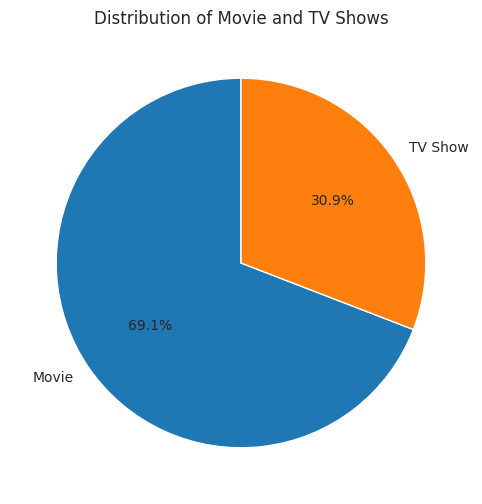

In [23]:
plt.figure(figsize=(8,6))
type_counts = df['type'].value_counts()
plt.pie(type_counts,labels=type_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Movie and TV Shows')
plt.show()

<Figure size 1000x800 with 0 Axes>

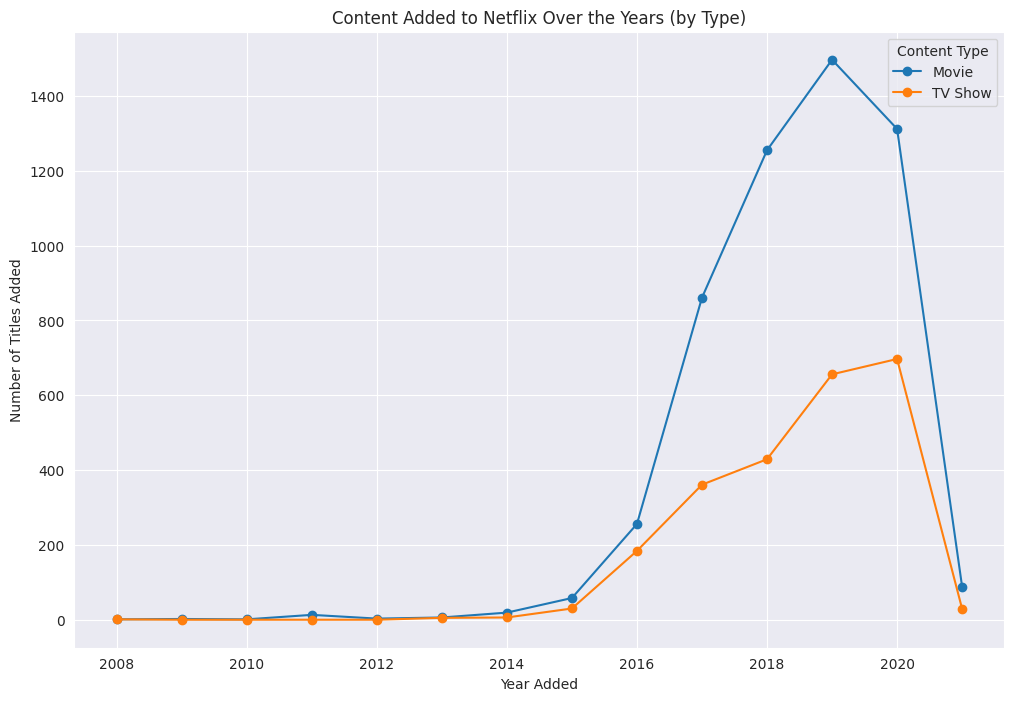

In [24]:
content_over_time = df.groupby(['year_added','type']).size().unstack().fillna(0)
plt.figure(figsize=(10,8))
content_over_time.plot(kind='line',marker='o',figsize=(12,8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

In [25]:
df['listed_in']

,listed_in
0,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,"Dramas, International Movies"
2,"Horror Movies, International Movies"
3,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Dramas
...,...
7782,"Dramas, International Movies"
7783,"Dramas, International Movies, Music & Musicals"
7784,"Documentaries, International Movies, Music & M..."
7785,"International TV Shows, Reality TV"


In [26]:
genres = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')

In [27]:
genres['genre'].value_counts()


,count
genre,
International Movies,2437
Dramas,2105
Comedies,1471
International TV Shows,1197
Documentaries,786
Action & Adventure,721
TV Dramas,703
Independent Movies,673
Children & Family Movies,532


In [28]:
Top_generes_count = genres['genre'].value_counts().reset_index()
Top_generes_count.columns = ['Genre','Count']


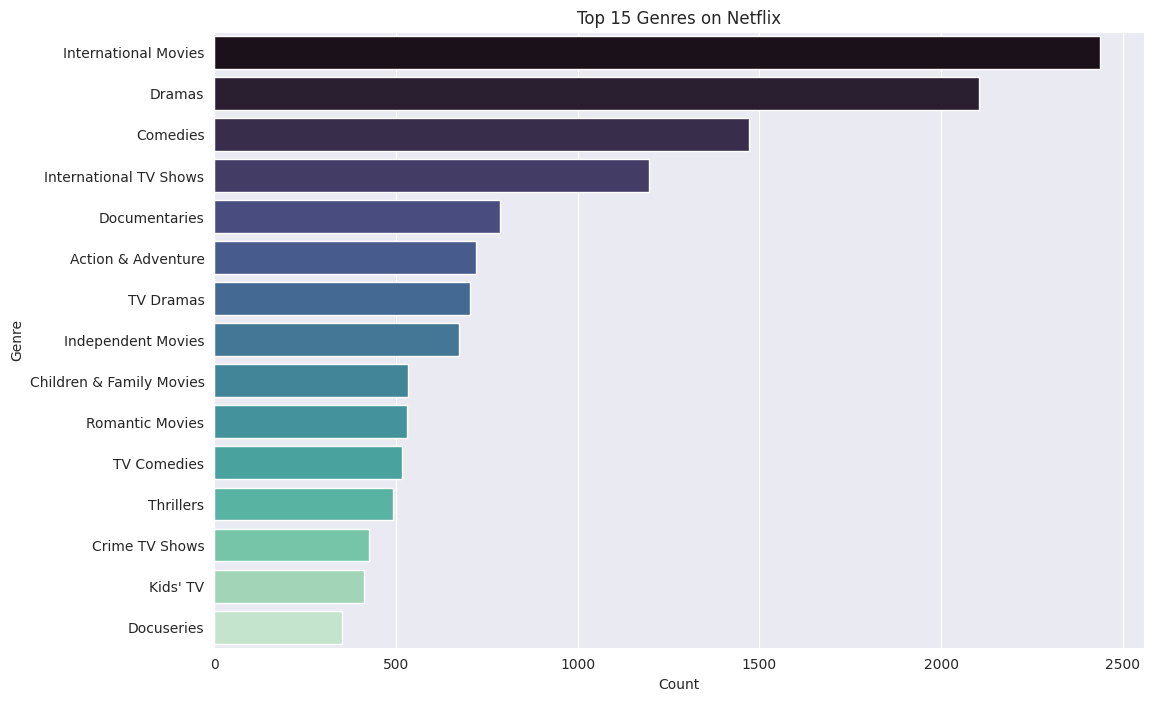

In [29]:
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count']

top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [30]:

#seperate Movies and Tv Shows
Movies = df[df['type']=='Movie']
TV_Shows = df[df['type']=='TV Show']

In [31]:
Movies['Duration_min']=Movies['duration'].str.replace(' min','').astype(int)

/tmp/ipython-input-3238935304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movies['Duration_min']=Movies['duration'].str.replace(' min','').astype(int)


In [32]:
TV_Shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1
11,s12,TV Show,1983,Unknown,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,11,30
12,s13,TV Show,1994,Diego Enrique Osorno,Unknown,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,5,17
16,s17,TV Show,Feb-09,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,3,20


In [33]:
TV_Shows['Seasons'] = TV_Shows['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

/tmp/ipython-input-311019577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_Shows['Seasons'] = TV_Shows['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)


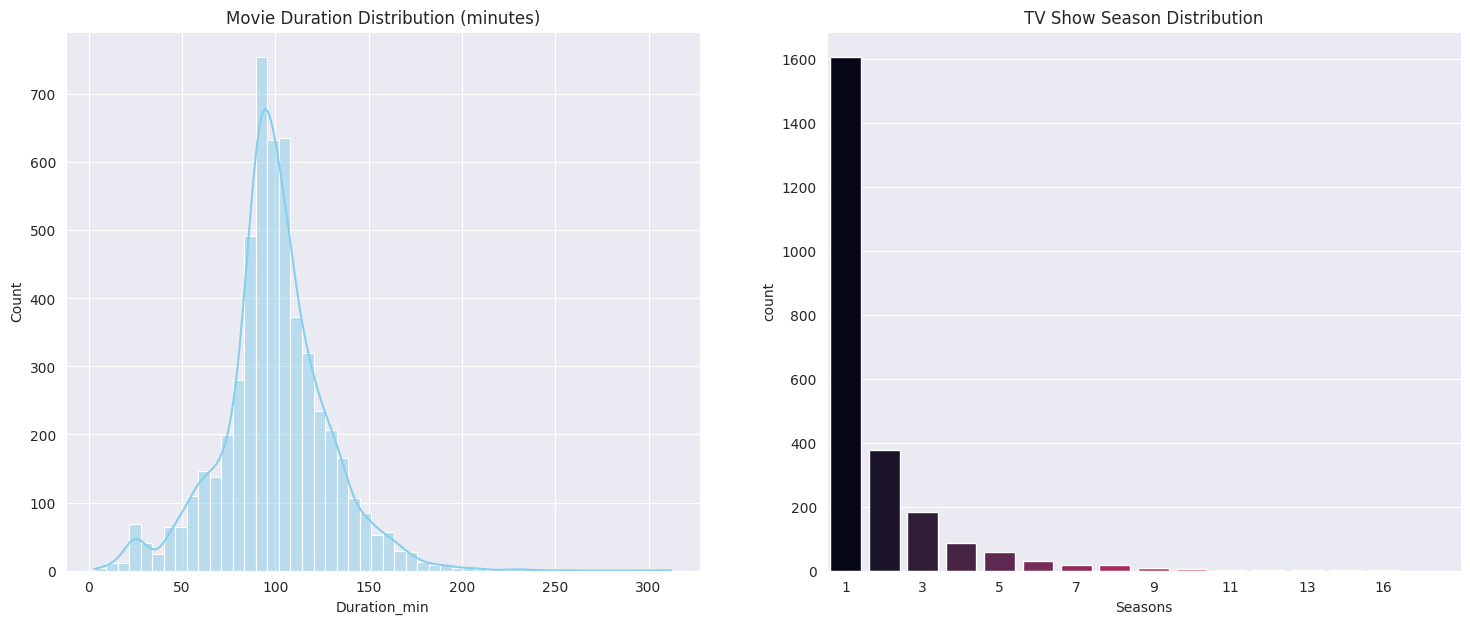

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.histplot(ax=axes[0], data=Movies, x='Duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

sns.countplot(ax=axes[1], x='Seasons', data=TV_Shows, palette='rocket', hue='Seasons', legend=False)
axes[1].set_title('TV Show Season Distribution')

max_seasons = int(TV_Shows['Seasons'].max())
axes[1].set_xticks(np.arange(0, max_seasons + 1, 2))

plt.show()

In [35]:
#Country
countries = df.assign(country=df['country'].str.split(', ')).explode('country')

In [36]:

top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count']

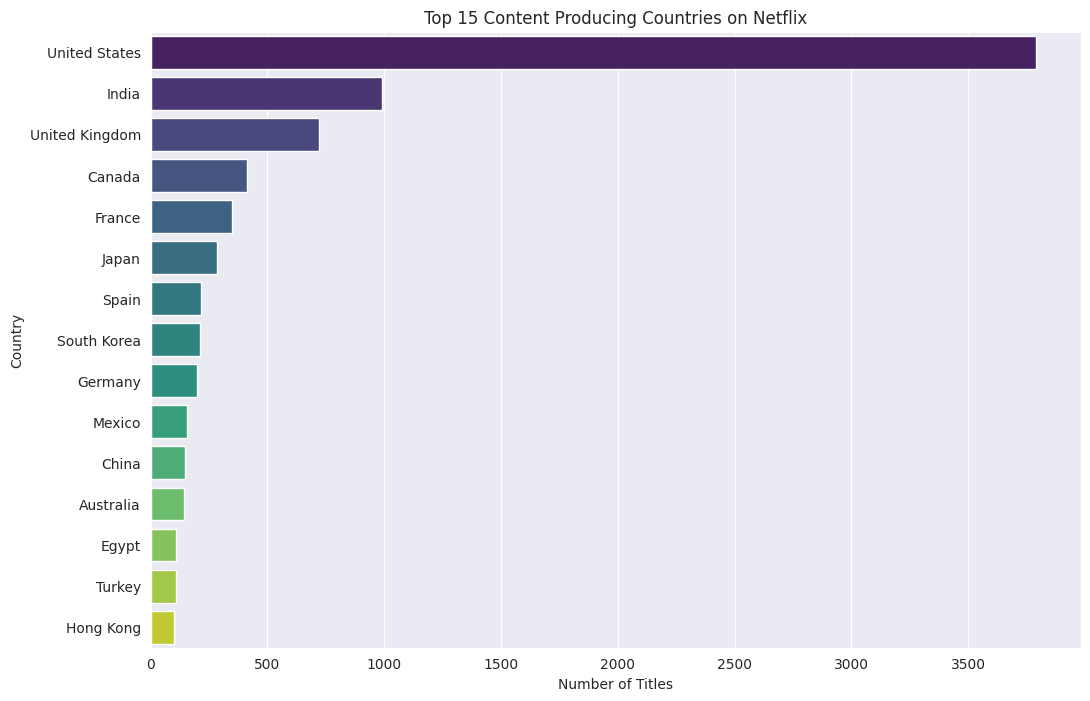

In [37]:
top_countries_counts_plot = top_countries_counts.head(15)


plt.figure(figsize=(12, 8))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')

plt.show()

In [38]:
#Maturiy Rating
df['rating'].value_counts()

,count
rating,
TV-MA,2861
TV-14,1928
TV-PG,804
R,665
PG-13,386
TV-Y,279
TV-Y7,270
PG,247
TV-G,194


/tmp/ipython-input-692567551.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


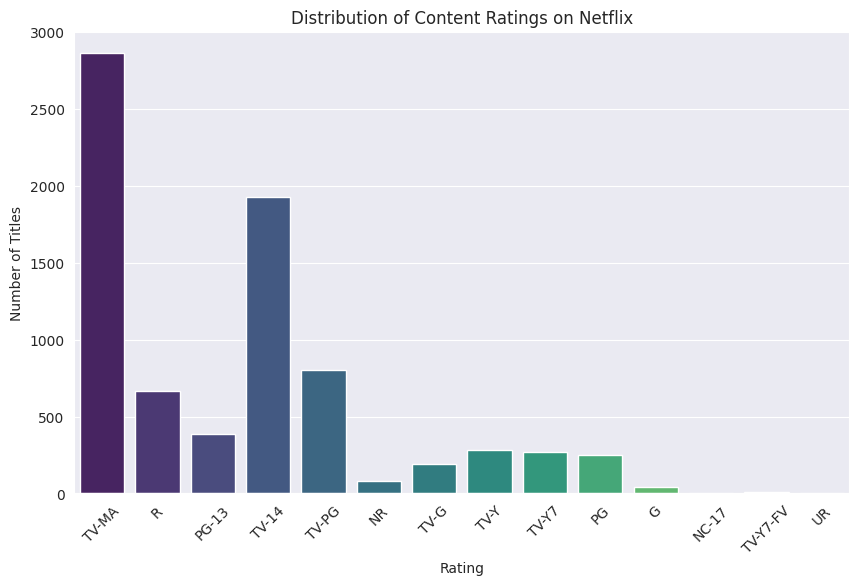

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

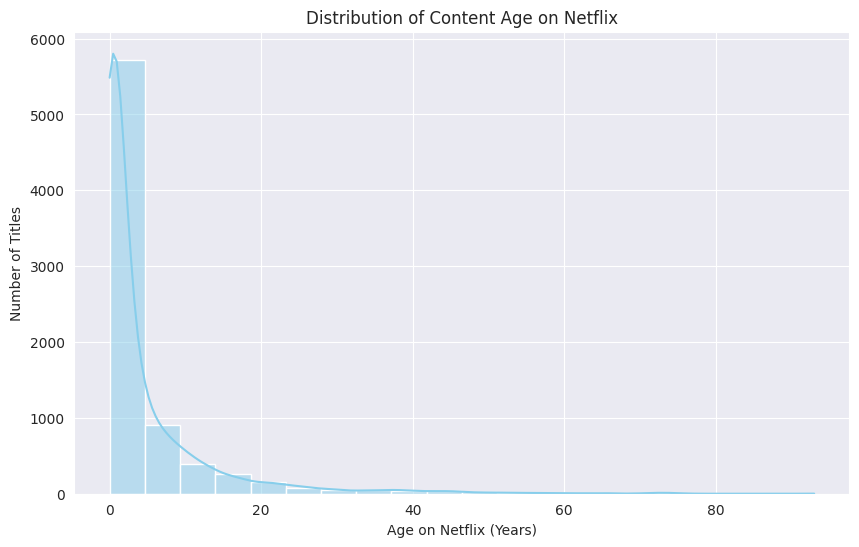

In [40]:
#Feature Engineering
df['age_on_Netflix']=df['year_added']-df['release_year']
content_age = df[df['age_on_Netflix']>= 0]
plt.figure(figsize=(10, 6))
sns.histplot(content_age['age_on_Netflix'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Content Age on Netflix')
plt.xlabel('Age on Netflix (Years)')
plt.ylabel('Number of Titles')
plt.show

### Step 6: Deeper Multivariate Analysis

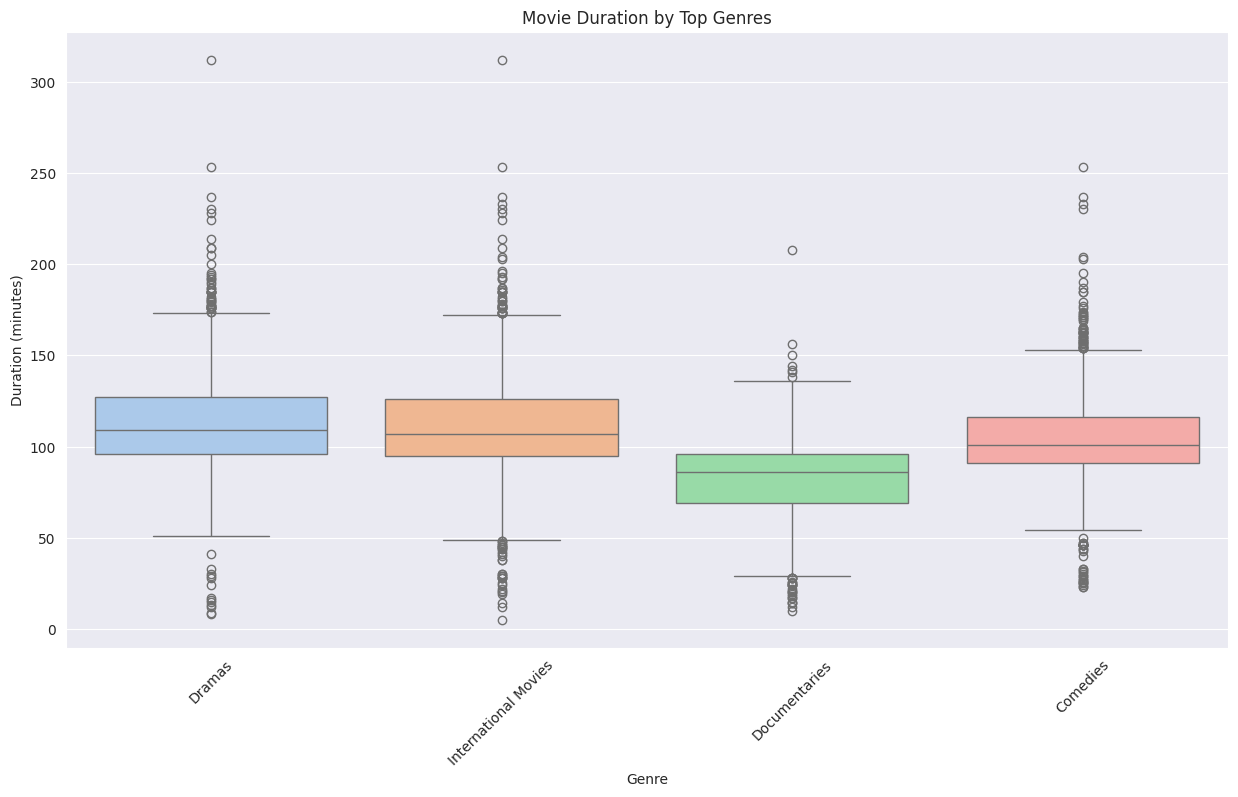

In [41]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

### Step 7: Word Cloud from Content Descriptions
As a final visual analysis, let's generate a word cloud from the `description` column to see what themes and words are most common in Netflix content.

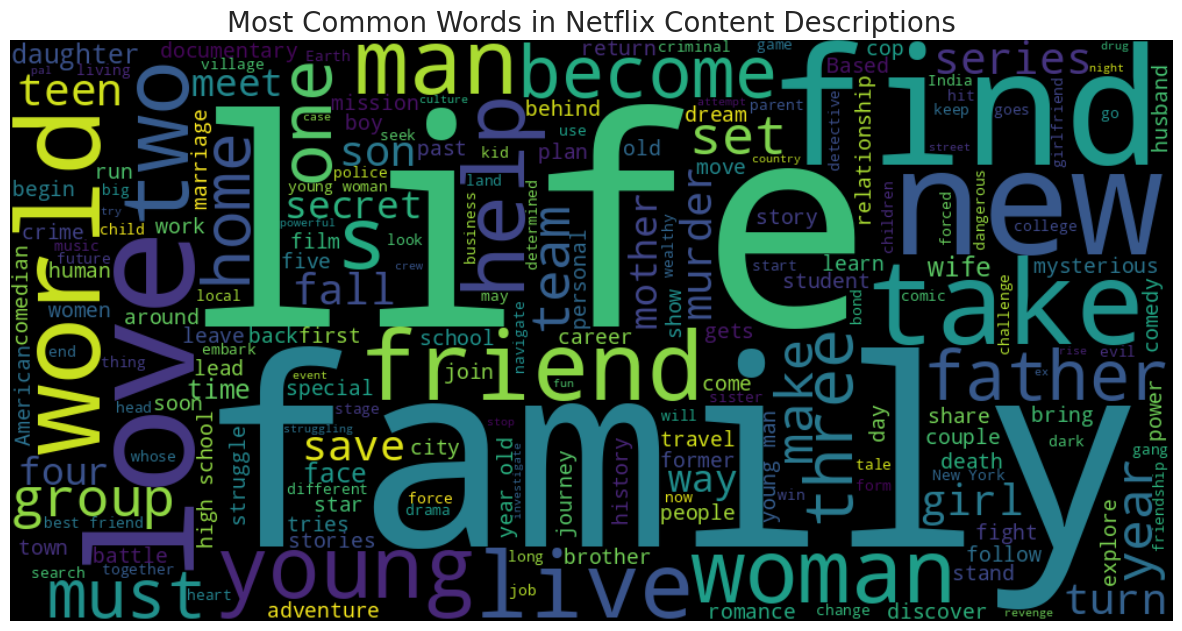

In [43]:
# Combine all descriptions into a single string
text = ' '.join(df['description'].dropna().astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='black'
).generate(text)

# Display the generated image
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()


**distribution of content ratings changed over time**

In [46]:
# Ensure release_year is numeric
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')


rating_year_df = df.dropna(subset=['rating', 'release_year'])
rating_trend = (
    rating_year_df
    .groupby(['release_year', 'rating'])
    .size()
    .reset_index(name='count')
)



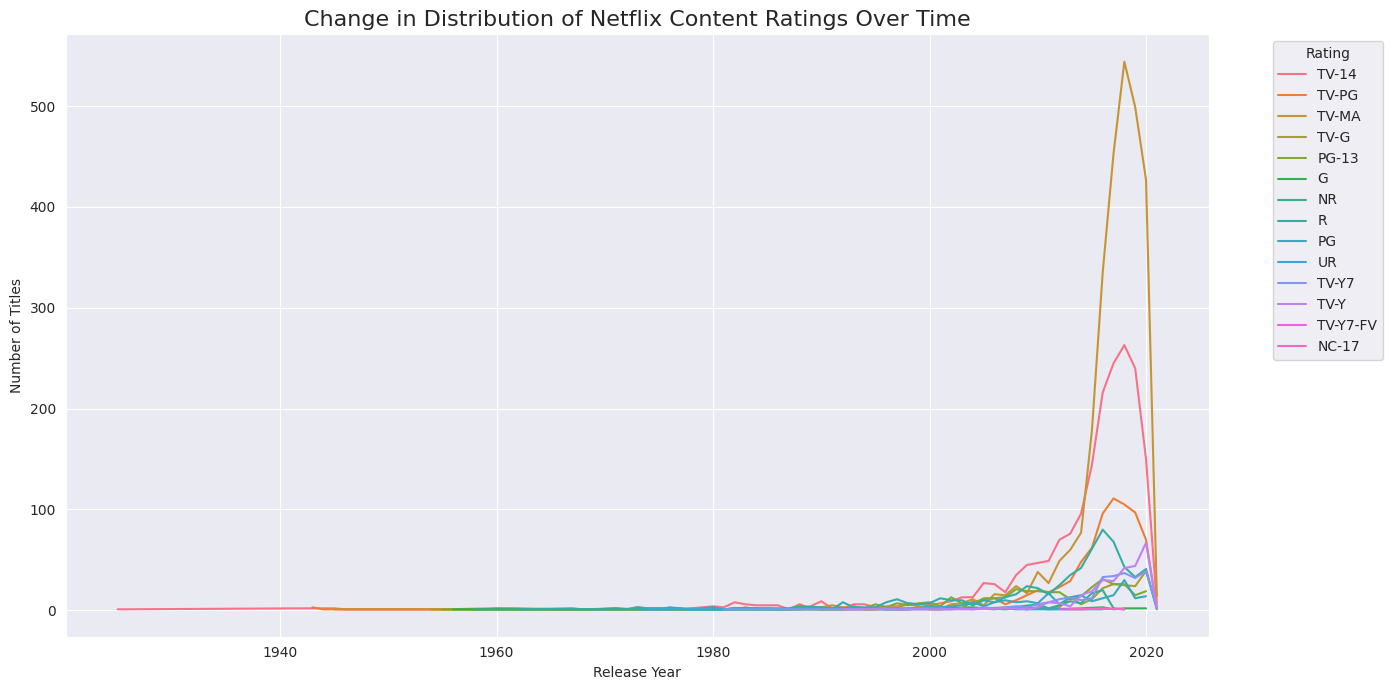

In [47]:
plt.figure(figsize=(14, 7))

sns.lineplot(
    data=rating_trend,
    x='release_year',
    y='count',
    hue='rating'
)

plt.title('Change in Distribution of Netflix Content Ratings Over Time', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**relationship between content age and its type (Movie vs. TV Show)**

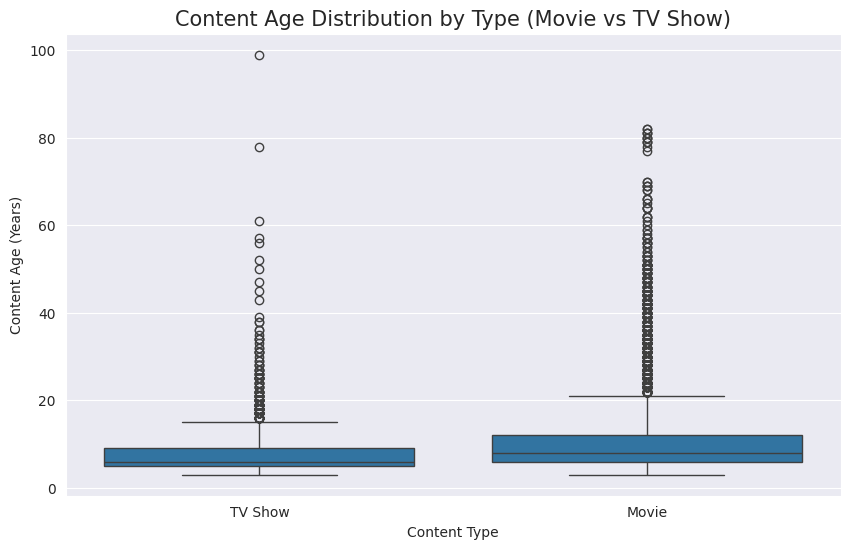

In [48]:
current_year = 2024

df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['content_age'] = current_year - df['release_year']

age_df = df.dropna(subset=['content_age', 'type'])
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=age_df,
    x='type',
    y='content_age'
)

plt.title('Content Age Distribution by Type (Movie vs TV Show)', fontsize=15)
plt.xlabel('Content Type')
plt.ylabel('Content Age (Years)')
plt.show()


In [49]:
age_summary = (
    age_df
    .groupby('type')['content_age']
    .mean()
    .reset_index()
)

age_summary


,type,content_age
0,Movie,11.081720
1,TV Show,7.786072


**Trends in content production based on the release year vs. the year added to Netflix**

In [50]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
trend_df = df.dropna(subset=['release_year', 'year_added'])


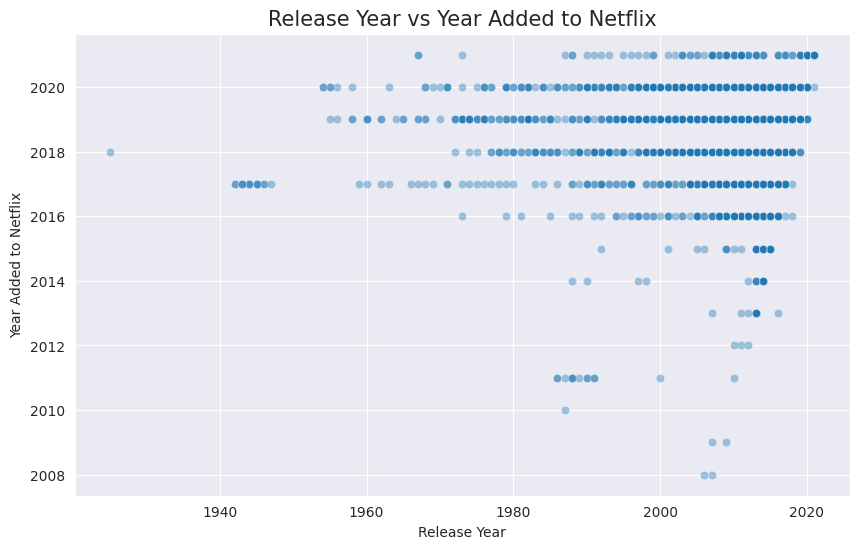

In [51]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=trend_df,
    x='release_year',
    y='year_added',
    alpha=0.4
)

plt.title('Release Year vs Year Added to Netflix', fontsize=15)
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.show()


In [52]:
trend_df['content_delay'] = trend_df['year_added'] - trend_df['release_year']

trend_df['content_delay'].describe()


,content_delay
count,7770.000000
mean,4.559588
std,8.734355
min,-3.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,93.000000


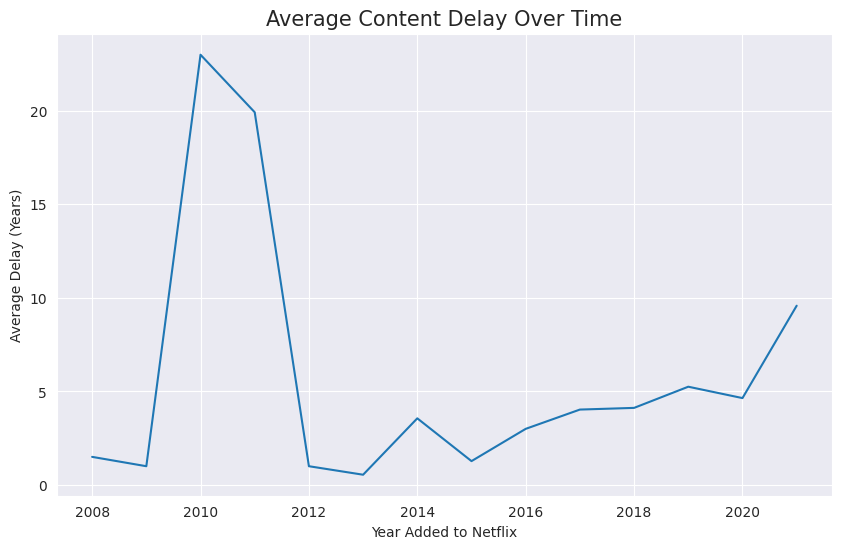

In [53]:
delay_trend = (
    trend_df
    .groupby('year_added')['content_delay']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=delay_trend,
    x='year_added',
    y='content_delay'
)

plt.title('Average Content Delay Over Time', fontsize=15)
plt.xlabel('Year Added to Netflix')
plt.ylabel('Average Delay (Years)')
plt.show()


*Most common word pairs or phrases in content descriptions**

In [54]:
import re
from sklearn.feature_extraction.text import CountVectorizer


In [55]:
# Clean description text
descriptions = (
    df['description']
    .dropna()
    .str.lower()
    .apply(lambda x: re.sub(r'[^a-z\s]', '', x))
)


In [56]:
  # Create bigram vectorizer
vectorizer = CountVectorizer(
    ngram_range=(2, 2),
    stop_words='english',
    min_df=10   # keeps meaningful phrases
)

bigram_matrix = vectorizer.fit_transform(descriptions)

# Convert to DataFrame
bigram_counts = (
    pd.DataFrame(
        bigram_matrix.sum(axis=0),
        columns=vectorizer.get_feature_names_out()
    )
    .T
    .rename(columns={0: 'count'})
    .sort_values(by='count', ascending=False)
)


In [57]:
bigram_counts.head(15)


,count
high school,128
young man,101
young woman,90
new york,82
best friends,52
standup special,48
true story,48
world war,44
best friend,43
based true,42


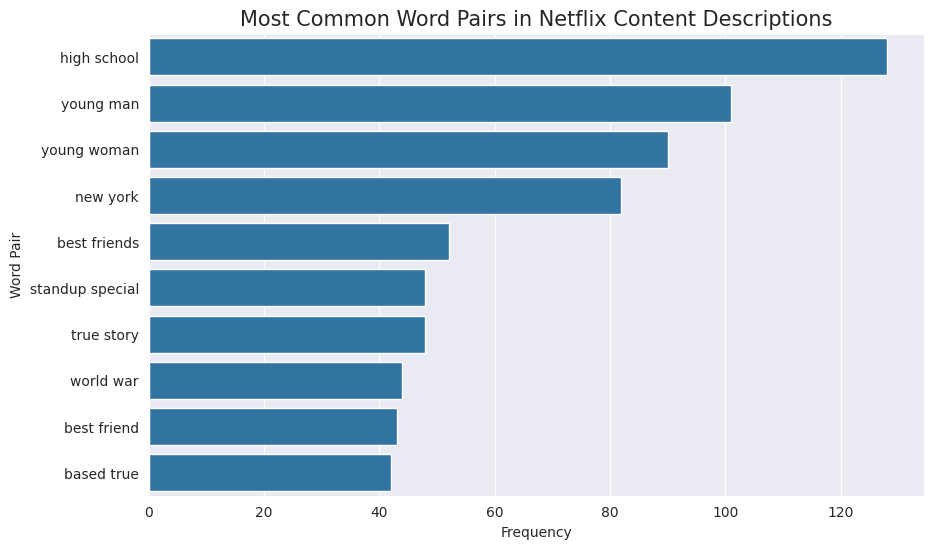

In [58]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x=bigram_counts.head(10)['count'],
    y=bigram_counts.head(10).index
)

plt.title('Most Common Word Pairs in Netflix Content Descriptions', fontsize=15)
plt.xlabel('Frequency')
plt.ylabel('Word Pair')
plt.show()


**Top directors on Netflix**

In [59]:

director_df = df.dropna(subset=['director'])
director_df = director_df.assign(
    director=director_df['director'].str.split(',')
).explode('director')
director_df['director'] = director_df['director'].str.strip()


In [60]:
top_directors = (
    director_df
    .groupby('director')
    .size()
    .reset_index(name='title_count')
    .sort_values(by='title_count', ascending=False)
)


In [61]:
top_directors.head(10)


,director,title_count
4251,Unknown,2376
1719,Jan Suter,21
3406,Raúl Campos,19
2576,Marcus Raboy,16
1762,Jay Karas,15
687,Cathy Garcia-Molina,13
2648,Martin Scorsese,12
1759,Jay Chapman,12
4431,Youssef Chahine,12
3972,Steven Spielberg,10


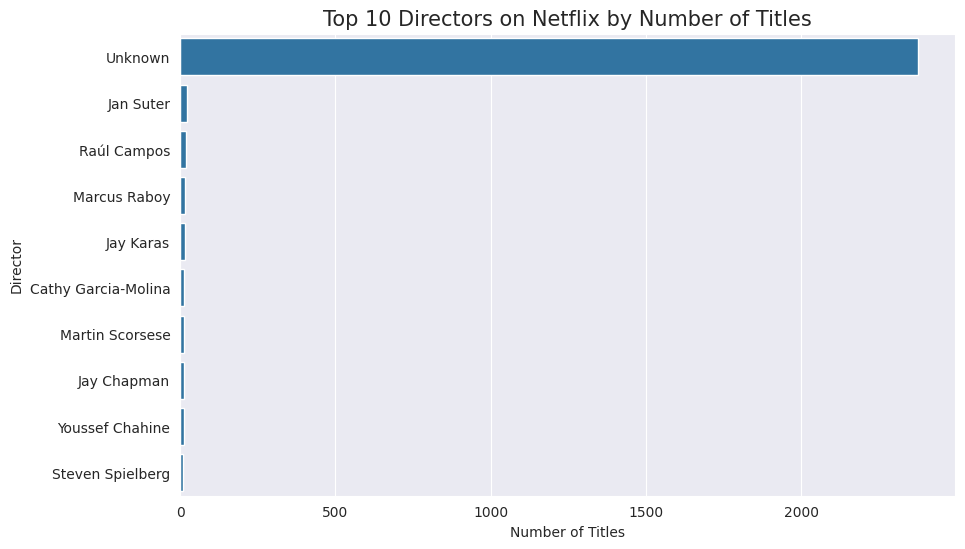

In [62]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_directors.head(10),
    x='title_count',
    y='director'
)

plt.title('Top 10 Directors on Netflix by Number of Titles', fontsize=15)
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()
